# Image Basics

本教程提供了关于Menpo图像的基本知识，它包括如下部分:
    
 1. 介绍
 2. 图像
 3. Boolean Image
 4. Masked Image
 5. Widgets

## 1. Introduction

**图像**是简单的**n维**规则像素阵列，其中n> = 2。每个像素具有k个通道。所有像素和所有通道都具有相同的数据类型，但通常对该数据类型没有限制。
有两个主要的子类：Image - BooleanImage和MaskedImage。绝大多数功能由Image提供，因此可用于所有三种图像类型 - 子类是简单的特殊化。

**注意出于效率的原因，我们通过在第一轴保存图像的通道数！**

因此，我们使用语法

     （[k]，i，j，...，l）
     
以声明图像形状大小。 i是图像第一维度的大小，j是第二图像维度的大小。 []表示通道 - 这个图像有k个通道。一些例子：

 - 低分辨率灰度图像：`（[1]，320，240）`
 - 高分辨率RGB图像：`（[3]，1700，1650）`
 - 灰度体素图像：`（[1]，1024,1024,1024）`
 
通常通道具有明确的含义 - 这些由<>表示。例如：

 - 低分辨率灰度图像：`（<I>，320，240）`
 - 高分辨率RGB图像：`（ <R，G，B>，1700，1650）`
 - 深度图像：`（ <Z>，1024,768）`
 
我们现在使用这个符号来解释所有的图像类。注意 - 一些类被固定为只有一个通道。这些图像的构造函数不希望你传递一个numpy数组。为了表示这一点，例如，通道签名包括感叹号，以表明它是为您隐式生成的

 - 深度图像：`（!<z>!, 1024,768） `
为了辅助说明，导入内置图像Takeo 和 Lena. `import_builtin_asset(asset_name)` 或 `import_builtin_asset.asset_name()`

In [5]:
%matplotlib inline
import numpy as np
import menpo.io as mio

lenna = mio.import_builtin_asset('lenna.png')
takeo_rgb = mio.import_builtin_asset.takeo_ppm() # equivalent to: mio.import_builtin_asset('takeo.ppm')
# Takeo is RGB with repeated channels - convert to greyscale
takeo = takeo_rgb.as_greyscale(mode='average')

In [6]:
print('Lenna is a {}'.format(type(lenna)))
print('Takeo is a {}'.format(type(takeo)))

Lenna is a <class 'menpo.image.base.Image'>
Takeo is a <class 'menpo.image.base.Image'>


## 2. Image

`([k], i, j, ...., n)` 所有图像都是 Image 的实例化。

In [7]:
from menpo.image import Image
print("Lenna 'isa' Image: {}".format(isinstance(lenna, Image)))
print("Takeo 'isa' Image: {}".format(isinstance(takeo, Image)))

Lenna 'isa' Image: True
Takeo 'isa' Image: True


**pixels**
- 实际图像数据保存在 `self.pixels`属性中. `self.pixels[0]` is refered to as the *channel axis* - it is always present on an instantiated subclass of `Image` (even if for instance we know the number of channels to always be 1)

In [8]:
print('Takeo shape: {}'.format(takeo.pixels.shape))
print('The number of channels in Takeo is {}'.format(takeo.pixels.shape[0]))
print("But the right way to find out is with the 'n_channels' property: {}".format(takeo.n_channels))
print('n_channels for Lenna is {}'.format(lenna.n_channels))

Takeo shape: (1L, 225L, 150L)
The number of channels in Takeo is 1
But the right way to find out is with the 'n_channels' property: 1
n_channels for Lenna is 3


**shape**
-  `self.shape`表示图像的空间大小 `(i, j, ..., n)`

In [4]:
print('Takeo has a shape of {}'.format(takeo.shape))
print('Lenna has a shape of {}'.format(lenna.shape))

Takeo has a shape of (225L, 150L)
Lenna has a shape of (512L, 512L)


**宽度和高度**

只是把图像作为一个数组，就像所有我们的其他数据。 因此，所有我们的算法，例如梯度，将由轴0,1，...，n而不是x，y，z（因为这将是轴1,0,2）排序。 我们上面的self.shape是底层数组的形状，所以在语义上（高度，宽度）。 你可以使用self.width和self.height属性检查

In [15]:
print('Takeo\'s arrangement in memory (for maths) is {}'.format(takeo.shape))
print('Semantically, Takeo has W:{} H:{}'.format(takeo.width, takeo.height))
print(takeo)  # shows the common semantic labels

Takeo's arrangement in memory (for maths) is (225L, 150L)
Semantically, Takeo has W:150 H:225
150W x 225H 2D Image with 1 channel


**centre**
- 返回图像的gemetric中心，按轴排序

In [7]:
# note that this is (axis0, axis1), which is (height, width) or (Y, X)!
print('The centre of Takeo is {}'.format(takeo.centre()))

The centre of Takeo is [ 112.5   75. ]


**counts**
- 图像通道数作为属性直接可访问。注意，n_pixels是信道独立-找到阵列（包括信道）使用的总大小n_elements。

In [8]:
print('Lenna n_dims : {}'.format(lenna.n_dims))
print('Lenna n_channels : {}'.format(lenna.n_channels))
print('Lenna n_pixels : {}'.format(lenna.n_pixels))
print('Lenna n_elements: {}'.format(lenna.n_elements))

Lenna n_dims : 2
Lenna n_channels : 3
Lenna n_pixels : 262144
Lenna n_elements: 786432


**view**
- 所有图像均可可视化。

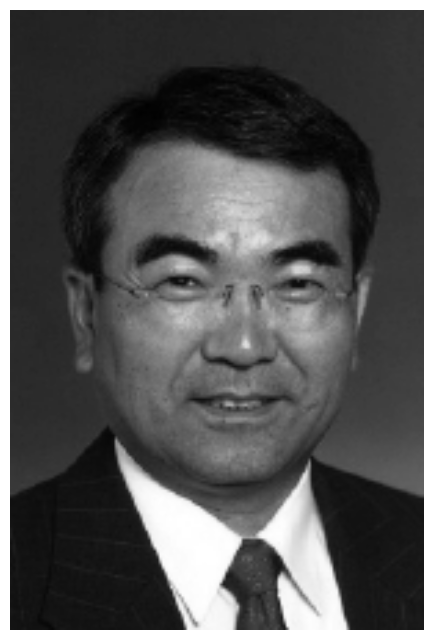

In [16]:
takeo.view();

- 并且 `view()` 函数有额外选项，如 `render_axes`, `axes_font_weight`, `alpha`, `figure_size` 等.

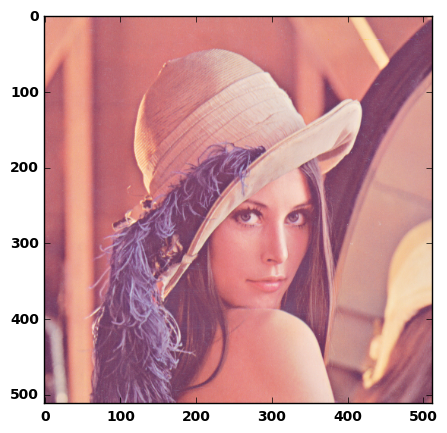

In [17]:
# render lenna with axes and transparency!
lenna.view(render_axes=True, axes_font_weight='bold', alpha=0.8, figure_size=(7, 5));

- You can pass the `channels=x` to inspect a single channel of the image...

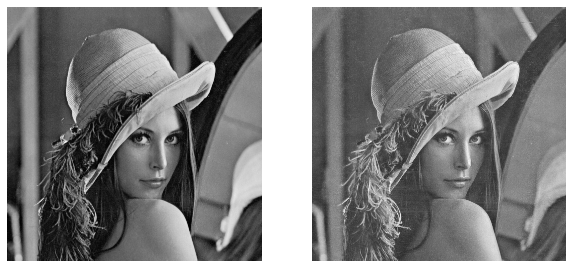

In [4]:
# viewing Lenna's green and blue channels...
lenna.view(channels=[1, 2]);

**crop**
- 所有图像都可裁剪。 有两种核心裁剪方法：crop_inplace（），它是inplace，和crop（）返回裁剪的图像，而不会损坏它被调用的实例。 两者执行相同的代码路径。 要裁剪，我们提供每个维度的最小值，我们希望裁剪开始，最大值，我们希望裁剪结束。 例如，要从中心到底部角落修剪竹笋，我们可以做

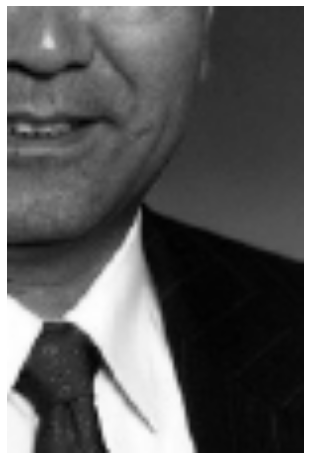

In [13]:
takeo_cropped = takeo.crop(takeo.centre(), np.array(takeo.shape))
takeo_cropped.view();

**rescale**
- 所有图像都可缩放。只需选择要应用比例因子。例如，为了使海伦两倍大

In [18]:
lenna_double = lenna.rescale(2.0)
print(lenna_double)

1024W x 1024H 2D Image with 3 channels


**landmark support**
- 所有图像都是可标记的

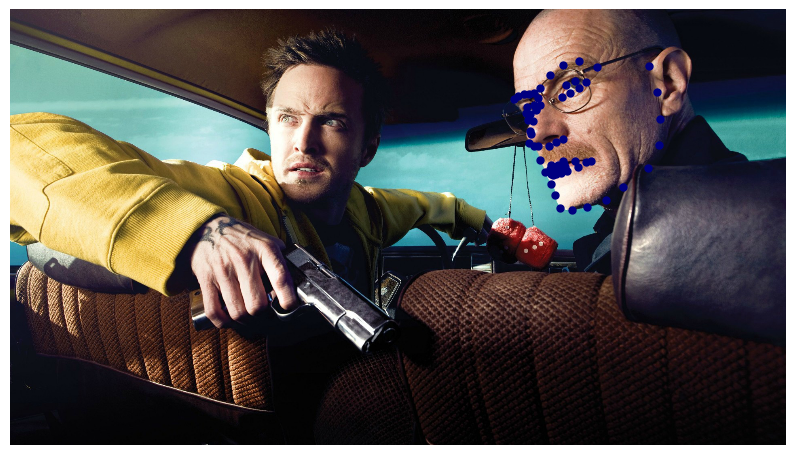

In [19]:
breakingbad = mio.import_builtin_asset('breakingbad.jpg')
breakingbad.view_landmarks(group='PTS');

In [20]:
print(breakingbad.landmarks)

LandmarkManager: n_groups: 1
(PTS): LandmarkGroup: n_labels: 1, n_points: 68


- 有时可以限制图像被绑定在它的地标上。 有两种方便的方法可以做到这一点。 期待一个边界参数`boundary`

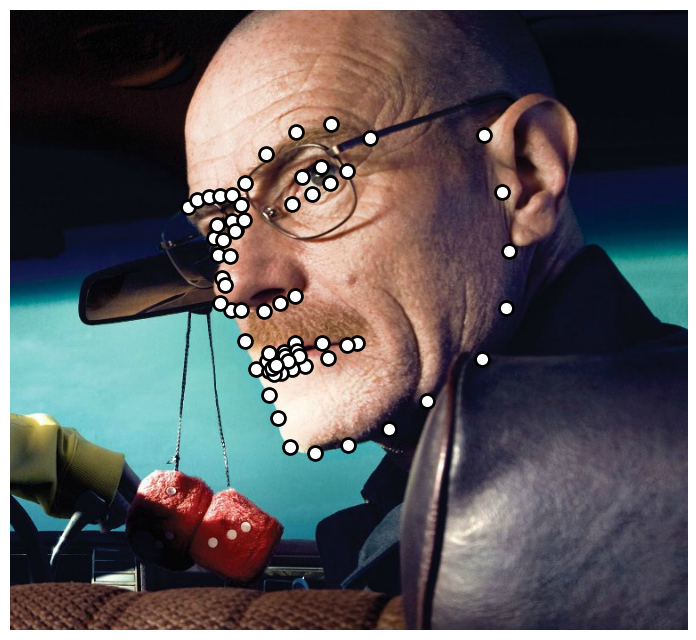

In [21]:
bb = breakingbad.crop_to_landmarks(boundary=200)
# note that this method is smart enough to not stray outside the boundary of the image
bb.view_landmarks(group='PTS', marker_size=10, marker_edge_colour='k', marker_face_colour='w', marker_edge_width=2);

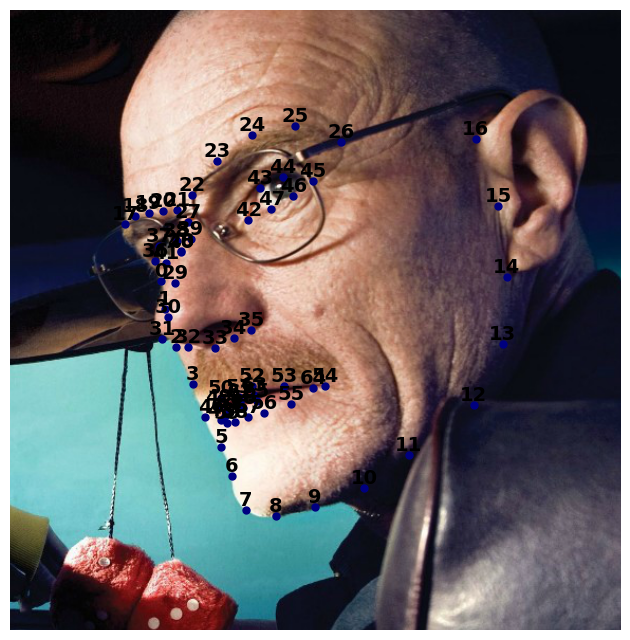

In [22]:
bb = breakingbad.crop_to_landmarks_proportion(0.3)
# note that this method is smart enough to not stray outside the boundary of the image
bb.view_landmarks(group='PTS', render_numbering=True, numbers_font_size=14, numbers_font_weight='bold');

Note that the `view_landmarks()` has lots of rendering options regarding axes, numbers, lines, marker and legend.

## 3. BooleanImage

`(!<B>!, i, j, ...., n)`

第一个具体形象的子类，我们将看看是BooleanImage。这是一个n维图像每个像素的单个信道。这一数据类型为np.bool。首先，记住BooleanImage是的一个子类Image，因此具有上述所有的功能。

the mask's shape is as expected: (512L, 512L)
the channel has been added to the mask's pixel's shape for us: (1L, 512L, 512L)


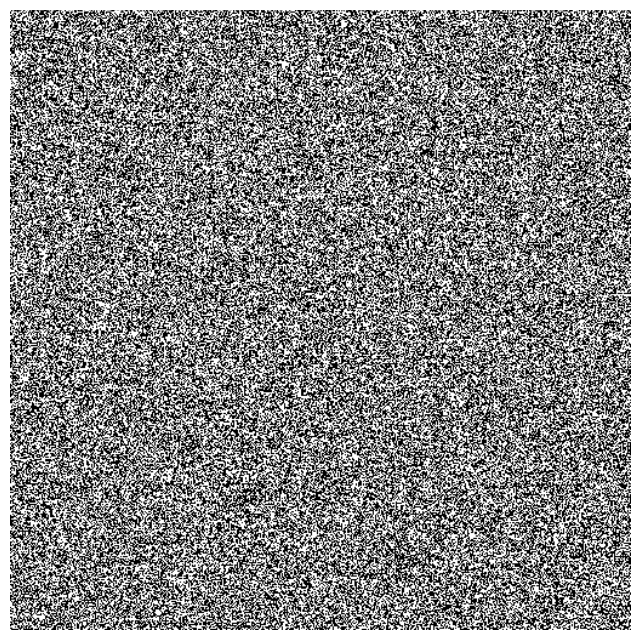

In [24]:
from menpo.image import BooleanImage
random_seed = np.random.random(lenna.shape ) # shape doesn't include channel - and that's what we want
random_mask = BooleanImage(random_seed > 0.5)
print("the mask's shape is as expected: {}".format(random_mask.shape))
print("the channel has been added to the mask's pixel's shape for us: {}".format(random_mask.pixels.shape))
random_mask.view();

请注意，布尔图像并不需要你传递构造函数中的冗余通道轴 

**blank()**
- 如果你只想要一个快速的所有真或所有假掩码使用blank（）方法。 你可以依靠这个存在于每个具体的Image类。

In [25]:
all_true_mask = BooleanImage.init_blank((120, 240))
all_false_mask = BooleanImage.init_blank((120, 240), fill=False)

**metrics**
- 统计Mask中有多少真假元素是很容易的

In [26]:
print('n_pixels on random_mask: {}'.format(random_mask.n_pixels))
print('n_true pixels on random_mask: {}'.format(random_mask.n_true()))
print('n_false pixels on random_mask: {}'.format(random_mask.n_false()))
print('proportion_true on random_mask: {:.3}'.format(random_mask.proportion_true()))
print('proportion_false on random_mask: {:.3}'.format(random_mask.proportion_false()))

n_pixels on random_mask: 262144
n_true pixels on random_mask: 131333
n_false pixels on random_mask: 130811
proportion_true on random_mask: 0.501
proportion_false on random_mask: 0.499


**true_indices/false_indices** 

- 此外，BooleanImage具有帮助使用类作为另一图像的掩码的功能。 indices属性使您可以访问True和False值的坐标，就好像蒙版已经展平了一样。

In [27]:
from copy import deepcopy
small_amount_true = deepcopy(all_false_mask)
small_amount_true.pixels[0, 4, 8] = True
small_amount_true.pixels[0, 15, 56] = True
small_amount_true.pixels[0, 0, 4] = True
print(small_amount_true.true_indices())  # note the ordering is incremental C ordered
print('The shape of true indices: {}'.format(small_amount_true.true_indices().shape))
print('The shape of false indices: {}'.format(small_amount_true.false_indices().shape))

[[ 0  4]
 [ 4  8]
 [15 56]]
The shape of true indices: (3L, 2L)
The shape of false indices: (28797L, 2L)


**indices索引**
- 对于完成后，您可以请求整个模板的索引

In [28]:
print('The shape of indices: {}'.format(small_amount_true.indices().shape))
# note that indices = true_indices + false_indices

The shape of indices: (28800L, 2L)


**mask**
- 如果您需要直接屏蔽相同的大小（与通道的arbitriy数）的另一种形象使用mask属性。这在大量使用MaskedImage。

In [14]:
lenna_masked_pixels_flatted = lenna.pixels[0, random_mask.mask]
lenna_masked_pixels_flatted.shape
# note we can only do this as random_mask is the shape of lenna
print('Is Lenna and random mask the same shape? {}'.format(lenna.shape == random_mask.shape))

Is Lenna and random mask the same shape? True


**print**
- 通常情况下，你只是想一个图像的概述。只是打印它得到快速摘要

In [25]:
print(random_mask)
print(lenna)
print(takeo)

512W x 512H 2D mask, 50.1% of which is True
512W x 512H 2D Image with 3 channels
150W x 225H 2D Image with 1 channel


## 4. MaskedImage

`([k], i, j, ...., n)`

最后一个Image子类是MaskedImage。 注意，通过menpo.io导入的所有图像都是Image的实例，如果您愿意，您应该手动将它们转换为MaskedImage实例。 就像你所期望的，MaskedImages有一个附加到他们的面具，增加了他们的通常的行为。

**mask**
- 所有MaskedImages有一个布尔图像适当大小附加到他们在mask属性。 在构造时，可以在掩码布尔值ndarray或布尔图像实例）上指定掩码。 如果没有提供任何内容，则掩码设置为全部。 具有所有真实屏蔽的MaskedImage的行为与图像完全相同 - 忽略性能损失。 Image实例可以使用as_masked（）方法转换为MaskedImage。

150W x 225H 2D mask, 100.0% of which is True
1920W x 1080H 2D mask, 100.0% of which is True


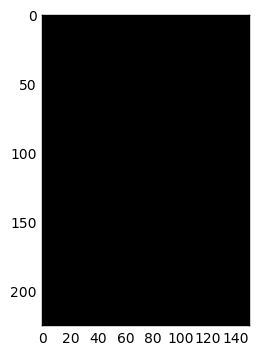

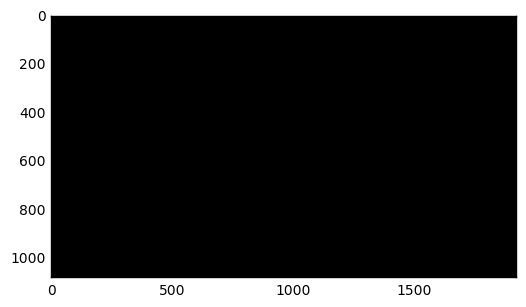

In [29]:
takeo_masked = takeo.as_masked()
print(takeo_masked.mask)
takeo_masked.mask.view(figure_size=(6, 4), render_axes=True);

breakingbad_masked = breakingbad.as_masked()
print(breakingbad_masked.mask)
breakingbad_masked.mask.view(new_figure=True, figure_size=(6, 4), render_axes=True);

**constrain_mask_to_landmarks**

- 它允许我们更新掩码等于图像上一些地标周围的凸包。 您可以选择特定的地标组（例如PTS），然后选择特定的标签（例如周边）。 默认情况下，如果两者都不提供（并且如果它们只是一个界标组），则所有界标被用于形成凸包。

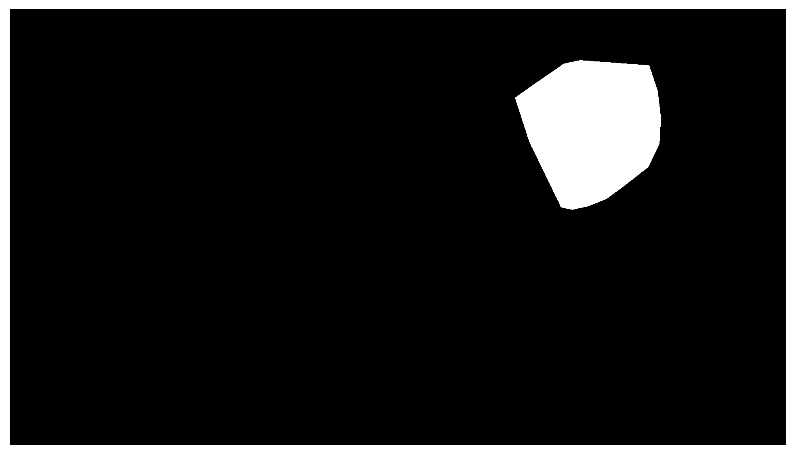

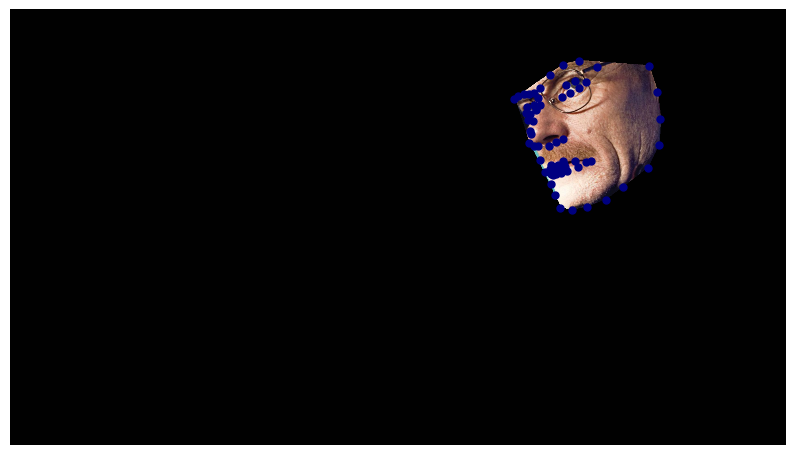

In [30]:
bb_masked_constrained = breakingbad_masked.constrain_mask_to_landmarks()
bb_masked_constrained.mask.view();
bb_masked_constrained.view_landmarks(new_figure=True);

**view behavior**
- By default, only the masked part of a masked image is shown when viewing

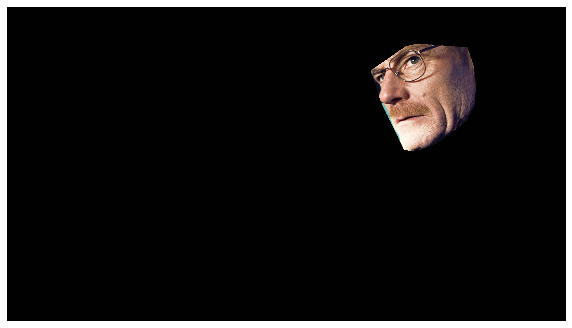

In [28]:
bb_masked_constrained.view();

- Use `masked=False` to see everything.

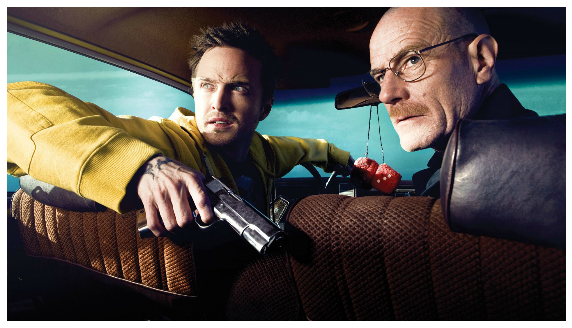

In [29]:
bb_masked_constrained.view(masked=False);

**as_vector() / from_vector() behavior**
- The `as_vector()` and `from_vector()` methods on `MaskedImage`s only returns `True` mask values flattened.

In [30]:
print('bb_masked_constrained has {} pixels, but only {} are '
      'masked.'.format(bb_masked_constrained.n_pixels, bb_masked_constrained.n_true_pixels()))
print('bb_masked_constrained has {} elements (3 x n_pixels)'.format(bb_masked_constrained.n_elements))
vectorized_bad = bb_masked_constrained.as_vector()
print('vector of bb_masked_constrained is of shape {}'.format(vectorized_bad.shape))

bb_masked_constrained has 2073600 pixels, but only 97498 are masked.
bb_masked_constrained has 6220800 elements (3 x n_pixels)
vector of bb_masked_constrained is of shape (292494,)


**constrain_mask_to_landmarks**
Allows us to update the mask to equal the convex hull around some landmarks on the image. You can choose a particular group of landmarks (e.g. `PTS`) and then a specific label (e.g. `perimeter`). By default, if neither are provided (and if their is only one landmark group) all the landmarks are used to form a convex hull.
constrain_mask_to_landmarks允许我们更新掩码等于图像上一些地标周围的凸包。 您可以选择特定的地标组（例如PTS），然后选择特定的标签（例如周边）。 默认情况下，如果两者都不提供（并且如果它们只是一个界标组），则所有界标被用于形成凸包。

## 5. Widgets

最后，值得注意的是，大多数以前的图像信息和可视化选项（和其他人，如图像保存）可以通过专门设计的图像IPython Notebook Widget方便地访问，只需在任何Menpo - Image对象上调用view_widget方法。 请注意，窗口小部件功能由menpowidgets项目提供，应使用conda（conda install -c menpo menpowidgets）单独安装。
该窗口小部件有几个与通道，地标和渲染器本身相关的选项。

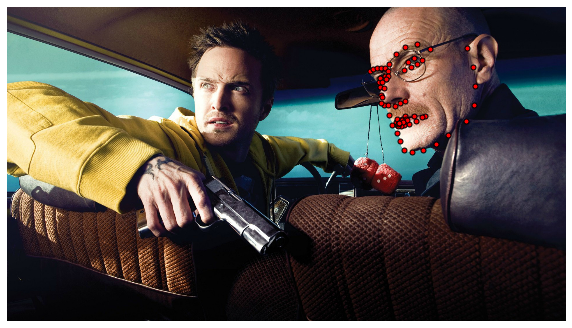

In [31]:
breakingbad.view_widget()

Similarly, a `list` of images can be viewed using the `visualize_images()` widget. The widget allows to animate through the images.

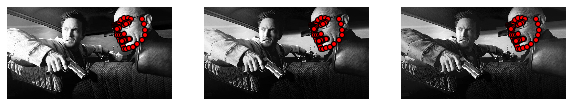

In [18]:
from menpowidgets import visualize_images

visualize_images([takeo, breakingbad_masked, lenna])